In [1]:
pip install imbalanced-learn

     |████████████████████████████████| 167 kB 4.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_0a1641f0b93840fdbf2573d1b05c9c21.csv"
df=pd.read_csv(url)
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [3]:
df.shape

(540, 21)

In [4]:
df.columns

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale',
       'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl', 'outcome'],
      dtype='object')

In [5]:
df1=df[df["Study"]==1]
df2=df[df["Study"]==2]

df_sub=pd.concat([df1,df2],axis=0)
df_sub.shape

(360, 21)

In [6]:
y_sub=df_sub[["outcome"]]
y_sub.head()

,outcome
0,0
1,1
2,1
3,1
4,1


In [7]:
X_sub=df_sub.drop(["Study","Run","outcome"],axis=1)
X_sub.head()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893
1,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256
2,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858
3,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987
4,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283


In [8]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X_sub, np.asarray(y_sub).reshape(y_sub.shape[0],))
features = fit.transform(X_sub)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
0,41.366402
1,37.173154
12,11.565006
13,9.699248
3,2.732187
11,2.380656
4,2.236718
16,1.975188
5,1.901303
15,1.876921


In [58]:
X_scores=scores[scores["scores"]>2]
len(X_scores)

7

In [59]:
Xp=X_sub.iloc[:,X_scores.index]
Xp.head()

,vconst_corr,vconst_2,convect_corr,bckgrnd_vdc1,vconst_4,vertical_decay_scale,vconst_5
0,0.859036,0.927825,0.997518,0.448620,0.298838,0.869091,0.170521
1,0.606041,0.457728,0.845247,0.864152,0.306957,0.914344,0.843331
2,0.997600,0.373238,0.718441,0.924775,0.504993,0.643995,0.618903
3,0.783408,0.104055,0.362751,0.912819,0.421837,0.761659,0.742056
4,0.406250,0.513199,0.650223,0.522261,0.635837,0.312349,0.844798


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xp,y_sub,test_size=0.24,random_state=42)
print(X_train.shape)
print(X_test.shape)

(273, 7)
(87, 7)


In [103]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(496, 7)

In [104]:
from sklearn import svm
SVM=svm.SVC(C=2).fit(X_res,np.asarray(y_res).reshape(y_res.shape[0],))
SVM

SVC(C=2)

In [105]:
from sklearn.metrics import accuracy_score
train_pred=SVM.predict(X_res)
test_pred=SVM.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_res,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9838709677419355
Accuracy on test data:  0.9540229885057471


In [106]:
from sklearn.metrics import roc_auc_score as auc
print("AUC for train data: ",auc(y_res,train_pred))
print("AUC for test data: ",auc(y_test,test_pred))

AUC for train data:  0.9838709677419355
AUC for test data:  0.975


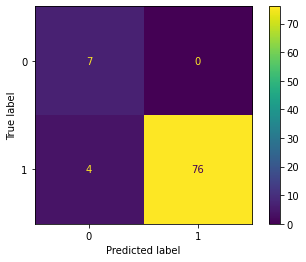

In [107]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVM,X_test,y_test)
plt.show()

In [105]:
df3=df[df["Study"]==3]
df3.shape

(180, 21)

In [106]:
y3=df3[["outcome"]]
y3.head()

,outcome
360,1
361,1
362,1
363,1
364,1


In [107]:
X3=df3.drop(["Study","Run","outcome"],axis=1)
X3.head()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
360,0.809543,0.837511,0.073442,0.589892,0.868431,0.351131,0.389901,0.188123,0.536543,0.732256,0.005864,0.661066,0.224211,0.842952,0.048439,0.330238,0.255728,0.565440
361,0.369924,0.987699,0.170430,0.981563,0.068741,0.280620,0.613980,0.321236,0.543237,0.283652,0.261827,0.737222,0.775260,0.196828,0.606249,0.750256,0.094154,0.666742
362,0.714288,0.792418,0.789954,0.906748,0.863046,0.386705,0.593317,0.881642,0.622044,0.836672,0.257204,0.459037,0.401002,0.039313,0.591884,0.432448,0.407422,0.175843
363,0.967564,0.541932,0.133147,0.851643,0.628999,0.921785,0.772271,0.942169,0.379395,0.127011,0.476791,0.997309,0.163334,0.952149,0.819902,0.952324,0.494093,0.607461
364,0.749636,0.178136,0.428031,0.631460,0.017963,0.859604,0.028397,0.126187,0.922381,0.649527,0.281640,0.870704,0.640460,0.827444,0.223857,0.650470,0.799945,0.229589


In [257]:
fit = test.fit(X3, np.asarray(y3).reshape(y3.shape[0],))
features = fit.transform(X3)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
1,16.814510
0,13.897396
13,10.021958
12,9.690864
10,1.872863
8,1.688351
15,1.519866
7,1.339477
6,1.315116
2,1.284490


In [258]:
X_scores=scores[scores["scores"]>1.3]
len(X_scores)

9

In [259]:
Xp=X3.iloc[:,X_scores.index]
Xp.head()

,vconst_2,vconst_corr,bckgrnd_vdc1,convect_corr,tidal_mix_max,slm_corr,bckgrnd_vdc_eq,ah_bolus,ah_corr
360,0.837511,0.809543,0.842952,0.224211,0.005864,0.536543,0.330238,0.188123,0.389901
361,0.987699,0.369924,0.196828,0.775260,0.261827,0.543237,0.750256,0.321236,0.613980
362,0.792418,0.714288,0.039313,0.401002,0.257204,0.622044,0.432448,0.881642,0.593317
363,0.541932,0.967564,0.952149,0.163334,0.476791,0.379395,0.952324,0.942169,0.772271
364,0.178136,0.749636,0.827444,0.640460,0.281640,0.922381,0.650470,0.126187,0.028397


In [260]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [271]:
SVM2=svm.SVC(C=4)
scores=cross_val_score(SVM2,Xp,np.asarray(y3).reshape(y3.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9888888888888889 +/- 0.011111111111111127


In [272]:
scores

array([1.   , 0.978, 0.978, 1.   ])

In [273]:
y_pred = cross_val_predict(SVM2, Xp,np.asarray(y3).reshape(y3.shape[0],), cv=2)
AUC = auc(y3, y_pred)
print("AUC: ",AUC)

AUC:  0.8928571428571428


In [274]:
print("Confusion matrix: \n",confusion_matrix(y3,y_pred))

Confusion matrix: 
 [[ 11   3]
 [  0 166]]


In [275]:
y=df[["outcome"]]
y.head()

,outcome
0,0
1,1
2,1
3,1
4,1


In [276]:
X=df.drop(["Study","Run","outcome"],axis=1)
X.head()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893
1,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256
2,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858
3,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987
4,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283


In [277]:
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
0,55.095686
1,54.144777
12,20.791303
13,18.899078
15,3.336226
3,2.826827
16,1.796167
4,1.596288
8,1.287635
5,1.276177


In [323]:
X_scores=scores[scores["scores"]>1.1]
len(X_scores)

11

In [324]:
Xp=X.iloc[:,X_scores.index]
Xp.head()

,vconst_corr,vconst_2,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_eq,vconst_4,bckgrnd_vdc_psim,vconst_5,slm_corr,vconst_7,vertical_decay_scale
0,0.859036,0.927825,0.997518,0.448620,0.858310,0.298838,0.796997,0.170521,0.474370,0.735936,0.869091
1,0.606041,0.457728,0.845247,0.864152,0.356573,0.306957,0.438447,0.843331,0.296618,0.934851,0.914344
2,0.997600,0.373238,0.718441,0.924775,0.250642,0.504993,0.285636,0.618903,0.815667,0.605571,0.643995
3,0.783408,0.104055,0.362751,0.912819,0.845921,0.421837,0.699431,0.742056,0.010015,0.490828,0.761659
4,0.406250,0.513199,0.650223,0.522261,0.376660,0.635837,0.280098,0.844798,0.358534,0.441502,0.312349


In [325]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xp,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(405, 11)
(135, 11)


In [326]:
BBagging3=BalancedBaggingClassifier(base_estimator=svm.SVC(C=5,kernel="linear"),sampling_strategy="not majority",
                                    n_estimators=6,
                                   random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
BBagging3

BalancedBaggingClassifier(base_estimator=SVC(C=5, kernel='linear'),
                          n_estimators=6, random_state=0,
                          sampling_strategy='not majority')

In [327]:
from sklearn.metrics import accuracy_score
train_pred=BBagging3.predict(X_train)
test_pred=BBagging3.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9703703703703703
Accuracy on test data:  0.9777777777777777


In [328]:
print("AUC for train data: ",auc(y_train,train_pred))
print("AUC for test data: ",auc(y_test,test_pred))

AUC for train data:  0.8673745173745173
AUC for test data:  0.8636363636363636


In [329]:
SVM2=svm.SVC(C=5).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
SVM2

SVC(C=5)

In [330]:
train_pred=SVM2.predict(X_train)
test_pred=SVM2.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.9629629629629629


In [331]:
print("AUC for train data: ",auc(y_train,train_pred))
print("AUC for test data: ",auc(y_test,test_pred))

AUC for train data:  1.0
AUC for test data:  0.8969941348973607


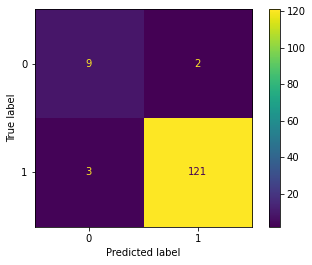

In [332]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(SVM2,X_test,y_test)
plt.show()

In [333]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape

(740, 11)

In [334]:
SVM3=svm.SVC(kernel="poly",degree=2).fit(X_res,np.asarray(y_res).reshape(y_res.shape[0],))
SVM3

SVC(degree=2, kernel='poly')

In [335]:
train_pred=SVM3.predict(X_res)
test_pred=SVM3.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_res,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9851351351351352
Accuracy on test data:  0.9629629629629629


In [336]:
print("AUC for train data: ",auc(y_res,train_pred))
print("AUC for test data: ",auc(y_test,test_pred))

AUC for train data:  0.985135135135135
AUC for test data:  0.93841642228739


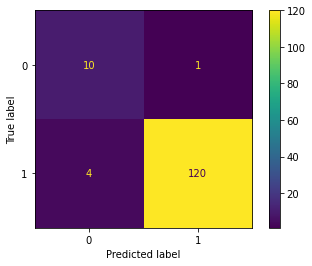

In [337]:
plot_confusion_matrix(SVM3,X_test,y_test)
plt.show()

#### Resampling by using SMOTE does not improve the SVM model's accuracy on test data. However, it boosted test data AUC from 0.897 to 0.9384. The model leaped from an excellent model to outstanding model.